1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


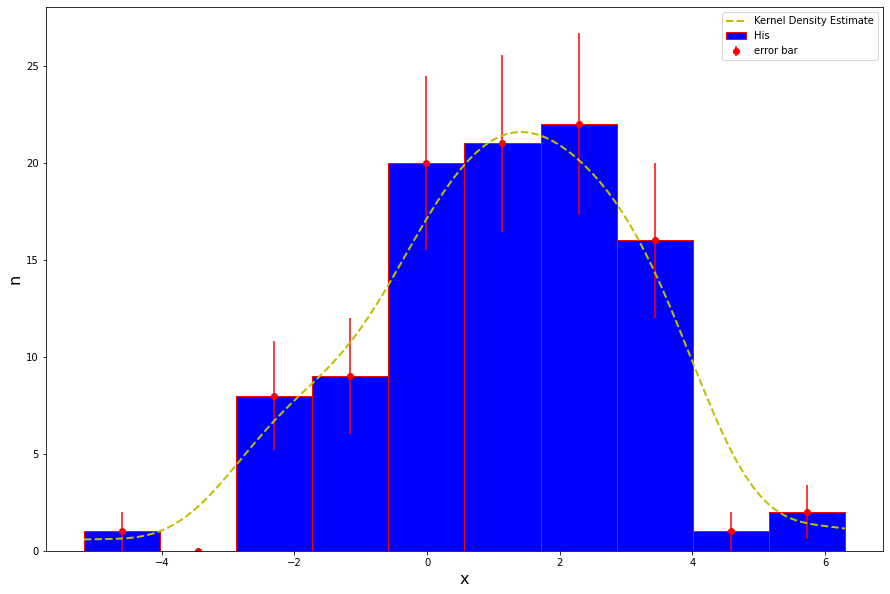

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import scipy as sp
from scipy import stats
import seaborn as sns
import pandas as pd
N=100
mean=2
std=1
x = np.array(np.random.normal(std, mean ,N)) #genarate data

fig, ax1 = plt.subplots(figsize=(15, 10))


bins =10
histX = ax1.hist(x, bins=bins,color = "blue", ec = "red",  label='His')
err = (histX[1][1:] + histX[1][:-1])/2

ax1.errorbar(err, histX[0], yerr=histX[0]**(0.5), fmt='o', color='red', label='error bar') 


ax1.set_xlabel("x", fontsize=16)
ax1.set_ylabel("n", fontsize=16)



sigma = 1.06*x.std()*x.size**(-1/5)
xx= np.linspace(x.min(), x.max(), N)
gaussians_pdf = np.zeros((N,N))

for i in range(N):    
    gaussians_pdf[i] = stats.norm.pdf(xx, x[i], sigma)


sumg = np.sum(gaussians_pdf, axis=0)
area = sp.integrate.trapz(y=sumg, x=xx)
normal = np.sum(np.diff(histX[1])*histX[0])/area

ax1.plot(xx, sumg*normal, '--y', linewidth=2, label='Kernel Density Estimate')
ax1.legend()


2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

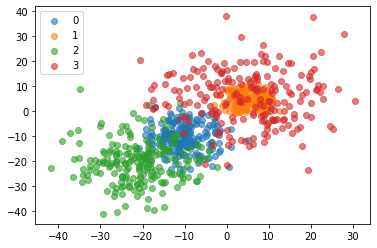

In [58]:
def genplot(N, m,std, n):

    #data details
    
    data=np.zeros((N,2))
    for i in range(N):
        data[i,:] = [m[i], std[i]]
        
    # data genaration:
    x= np.zeros((N,n))
    y= np.zeros((N,n))
    for i in range(0, N, 1):
        x[i,:] = np.random.normal(data[i,0], data[i,1], n)
        y[i,:] = np.random.normal(data[i,0], data[i,1], n)
    for i in range(0, N, 1):
        plt.scatter(x[i, :], y[i,:], alpha=0.6, label=i)
    plt.legend()

N = 4
m = [-10, 5, -20,5,10] # It should be N parameters
std= [5, 2.9, 8,10]

n = 200

genplot(N, m,std, n)

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [62]:
df = pd.DataFrame(np.load('residuals_261.npy', allow_pickle = True).item())
df

FileNotFoundError: [Errno 2] No such file or directory: 'residuals_261.npy'

In [63]:
df = pd.DataFrame(np.load('residuals_261.npy', allow_pickle = True).item())
df

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
2,-7.200000,3.4
3,-4.150000,8.4
4,-6.590000,1.7
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


LinregressResult(slope=0.0032597701220305813, intercept=-0.1543281676306947, rvalue=0.04340351052255907, pvalue=8.717037183576494e-06, stderr=0.0007327014008445789)


Text(0.5, 0, 'distances')

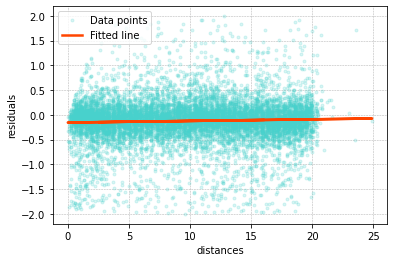

In [71]:
df_clean = df[df['residuals'].abs() < 2.0]

y = df_clean['residuals']
x = df_clean['distances']

m, q, r_value, p_value, std_err = stats.linregress(x, y)
print(stats.linregress(x, y))


plt.plot(x, y, '.', color = 'mediumturquoise',label = 'Data points',alpha=0.2)
plt.plot(x, q + m*x, color = 'orangered',linewidth = 2.5 , label = 'Fitted line')
plt.grid(linestyle = "--", linewidth = 0.5)
plt.legend()
plt.ylabel('residuals')
plt.xlabel('distances')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-87-67260a12a007>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.loc[binclass, "bin"] = i
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<

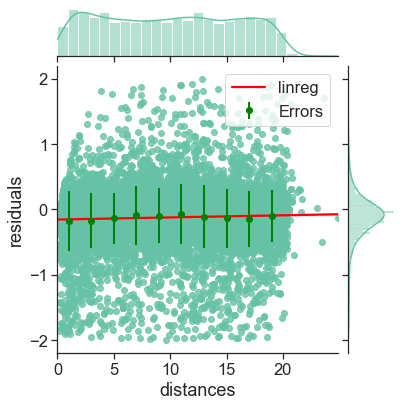

In [87]:
import seaborn as sns
sns.set(style='ticks', palette="Set2", font_scale = 1.5)
sns.jointplot(x="distances", y="residuals", data=df_clean, kind="reg",line_kws={'color':'red', 'label':'linreg'})

n_bins = 10
bins = np.linspace(0, 20, n_bins+1)
x = (binedgs + 20/(n_bins*2))[:-1]

for i in range(len(x)):
    binclass = (bins[i] <= df_clean["distances"]) & ( bins[i+1]>df_clean["distances"])
    df_clean.loc[binclass, "bin"] = i

y = df_clean.groupby("bin")["residuals"].mean().values   
yerr = df_clean.groupby("bin")["residuals"].std().values  

plt.errorbar(x, y, yerr, label = 'Errors', linewidth = 2, fmt = 'o', c='green')
plt.legend()